<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

## Assignment Objective
The aim of this assignment is to guide you through the process of understanding a dataset,
performing preprocessing, building classification models, including ensemble learning techniques,
and evaluation using cross-validation and various metrics.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

### Data Exploration


In [44]:
df = pd.read_csv('Student_dataset.csv')
df.head()


AttributeError: 'DataFrame' object has no attribute 'matrix'

In [21]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (4446, 37)
List of attributes:  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Cu

None

In [35]:
df2 = df
df2.isna().sum()

Marital status                                     0
Application mode                                   2
Application order                                  0
Course                                             6
Daytime/evening attendance\t                       0
Previous qualification                             0
Previous qualification (grade)                     7
Nacionality                                        0
Mother's qualification                             3
Father's qualification                             0
Mother's occupation                                0
Father's occupation                                0
Admission grade                                   18
Displaced                                          3
Educational special needs                          0
Debtor                                             2
Tuition fees up to date                            0
Gender                                             0
Scholarship holder                            

In [36]:
df.select_dtypes(['int64', 'float64']).describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4446.000000,4444.000000,4446.00000,4440.000000,4446.000000,4446.000000,4439.000000,4446.000000,4443.000000,4446.000000,...,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,1.179037,18.663816,1.72717,8858.807432,0.891138,4.585245,132.640572,1.896986,19.552104,22.284300,...,0.137427,0.543860,6.234818,8.065902,4.438147,10.241403,0.150022,11.572380,1.227823,-0.000684
std,0.606208,17.490937,1.31343,2060.398841,0.311501,10.224512,13.221879,7.075343,15.610384,15.345329,...,0.689473,1.921926,2.194935,3.941864,3.012180,5.200845,0.752190,2.664197,1.383290,2.269432
min,1.000000,1.000000,0.00000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.00000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.00000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.00000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.00000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [43]:
df3 = df2.select_dtypes(['int64', 'float64']).isna()
df3[df3.isna().any(axis=1)].iloc[:, 0]

Series([], Name: Marital status, dtype: bool)

In [31]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,Target
count,4446
unique,3
top,Graduate
freq,2221


In [19]:
corr = df.corr(method = 'pearson')
corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264768,-0.126252,0.046662,-0.274427,0.063742,-0.023435,-0.009861,0.193885,0.130684,...,0.034238,0.061421,0.038564,0.023682,-0.044325,-0.071273,0.020022,-0.019977,0.008251,-0.025820
Application mode,0.264768,1.000000,-0.286193,0.062827,-0.304050,0.423137,-0.041317,-0.004277,0.121245,0.084427,...,0.045873,0.240079,0.131099,0.169102,-0.070399,-0.114651,0.048749,0.089050,-0.017246,-0.020117
Application order,-0.126252,-0.286193,1.000000,0.059272,0.158336,-0.184497,-0.064203,-0.021424,-0.066213,-0.051637,...,-0.031625,-0.125243,0.029251,-0.054840,0.072358,0.055239,-0.015718,-0.097589,-0.008600,0.028490
Course,0.046662,0.062827,0.059272,1.000000,-0.043121,0.006557,-0.076263,-0.031425,0.053855,0.051323,...,0.034398,-0.090486,0.398007,0.276266,0.197388,0.346728,0.030712,0.008763,0.019666,-0.023182
Daytime/evening attendance\t,-0.274427,-0.304050,0.158336,-0.043121,1.000000,-0.071042,0.053632,0.019307,-0.205023,-0.139847,...,0.045581,-0.110769,0.001202,0.015188,0.034062,0.050586,-0.004214,0.061924,-0.023199,0.022190
Previous qualification,0.063742,0.423137,-0.184497,0.006557,-0.071042,1.000000,0.102874,-0.029870,-0.013295,-0.005291,...,0.002502,0.143071,0.056518,0.115660,-0.009058,0.001236,0.005840,0.113288,-0.065223,0.064269
Previous qualification (grade),-0.023435,-0.041317,-0.064203,-0.076263,0.053632,0.102874,1.000000,0.050067,-0.059054,-0.032342,...,-0.002272,-0.019053,-0.030202,-0.061154,0.050118,0.054423,-0.016584,0.044184,0.017273,-0.052765
Nacionality,-0.009861,-0.004277,-0.021424,-0.031425,0.019307,-0.029870,0.050067,1.000000,-0.051628,-0.086937,...,0.008160,-0.008320,-0.020143,-0.027215,-0.019828,-0.007707,-0.014427,-0.001224,-0.008961,0.036123
Mother's qualification,0.193885,0.121245,-0.066213,0.053855,-0.205023,-0.013295,-0.059054,-0.051628,1.000000,0.534667,...,0.003339,0.043943,0.036620,0.022132,-0.014307,-0.030333,0.021404,-0.115345,0.060020,-0.081962
Father's qualification,0.130684,0.084427,-0.051637,0.051323,-0.139847,-0.005291,-0.032342,-0.086937,0.534667,1.000000,...,-0.016728,0.043728,0.024982,0.010015,0.006133,-0.007551,-0.006912,-0.079200,0.057110,-0.070986


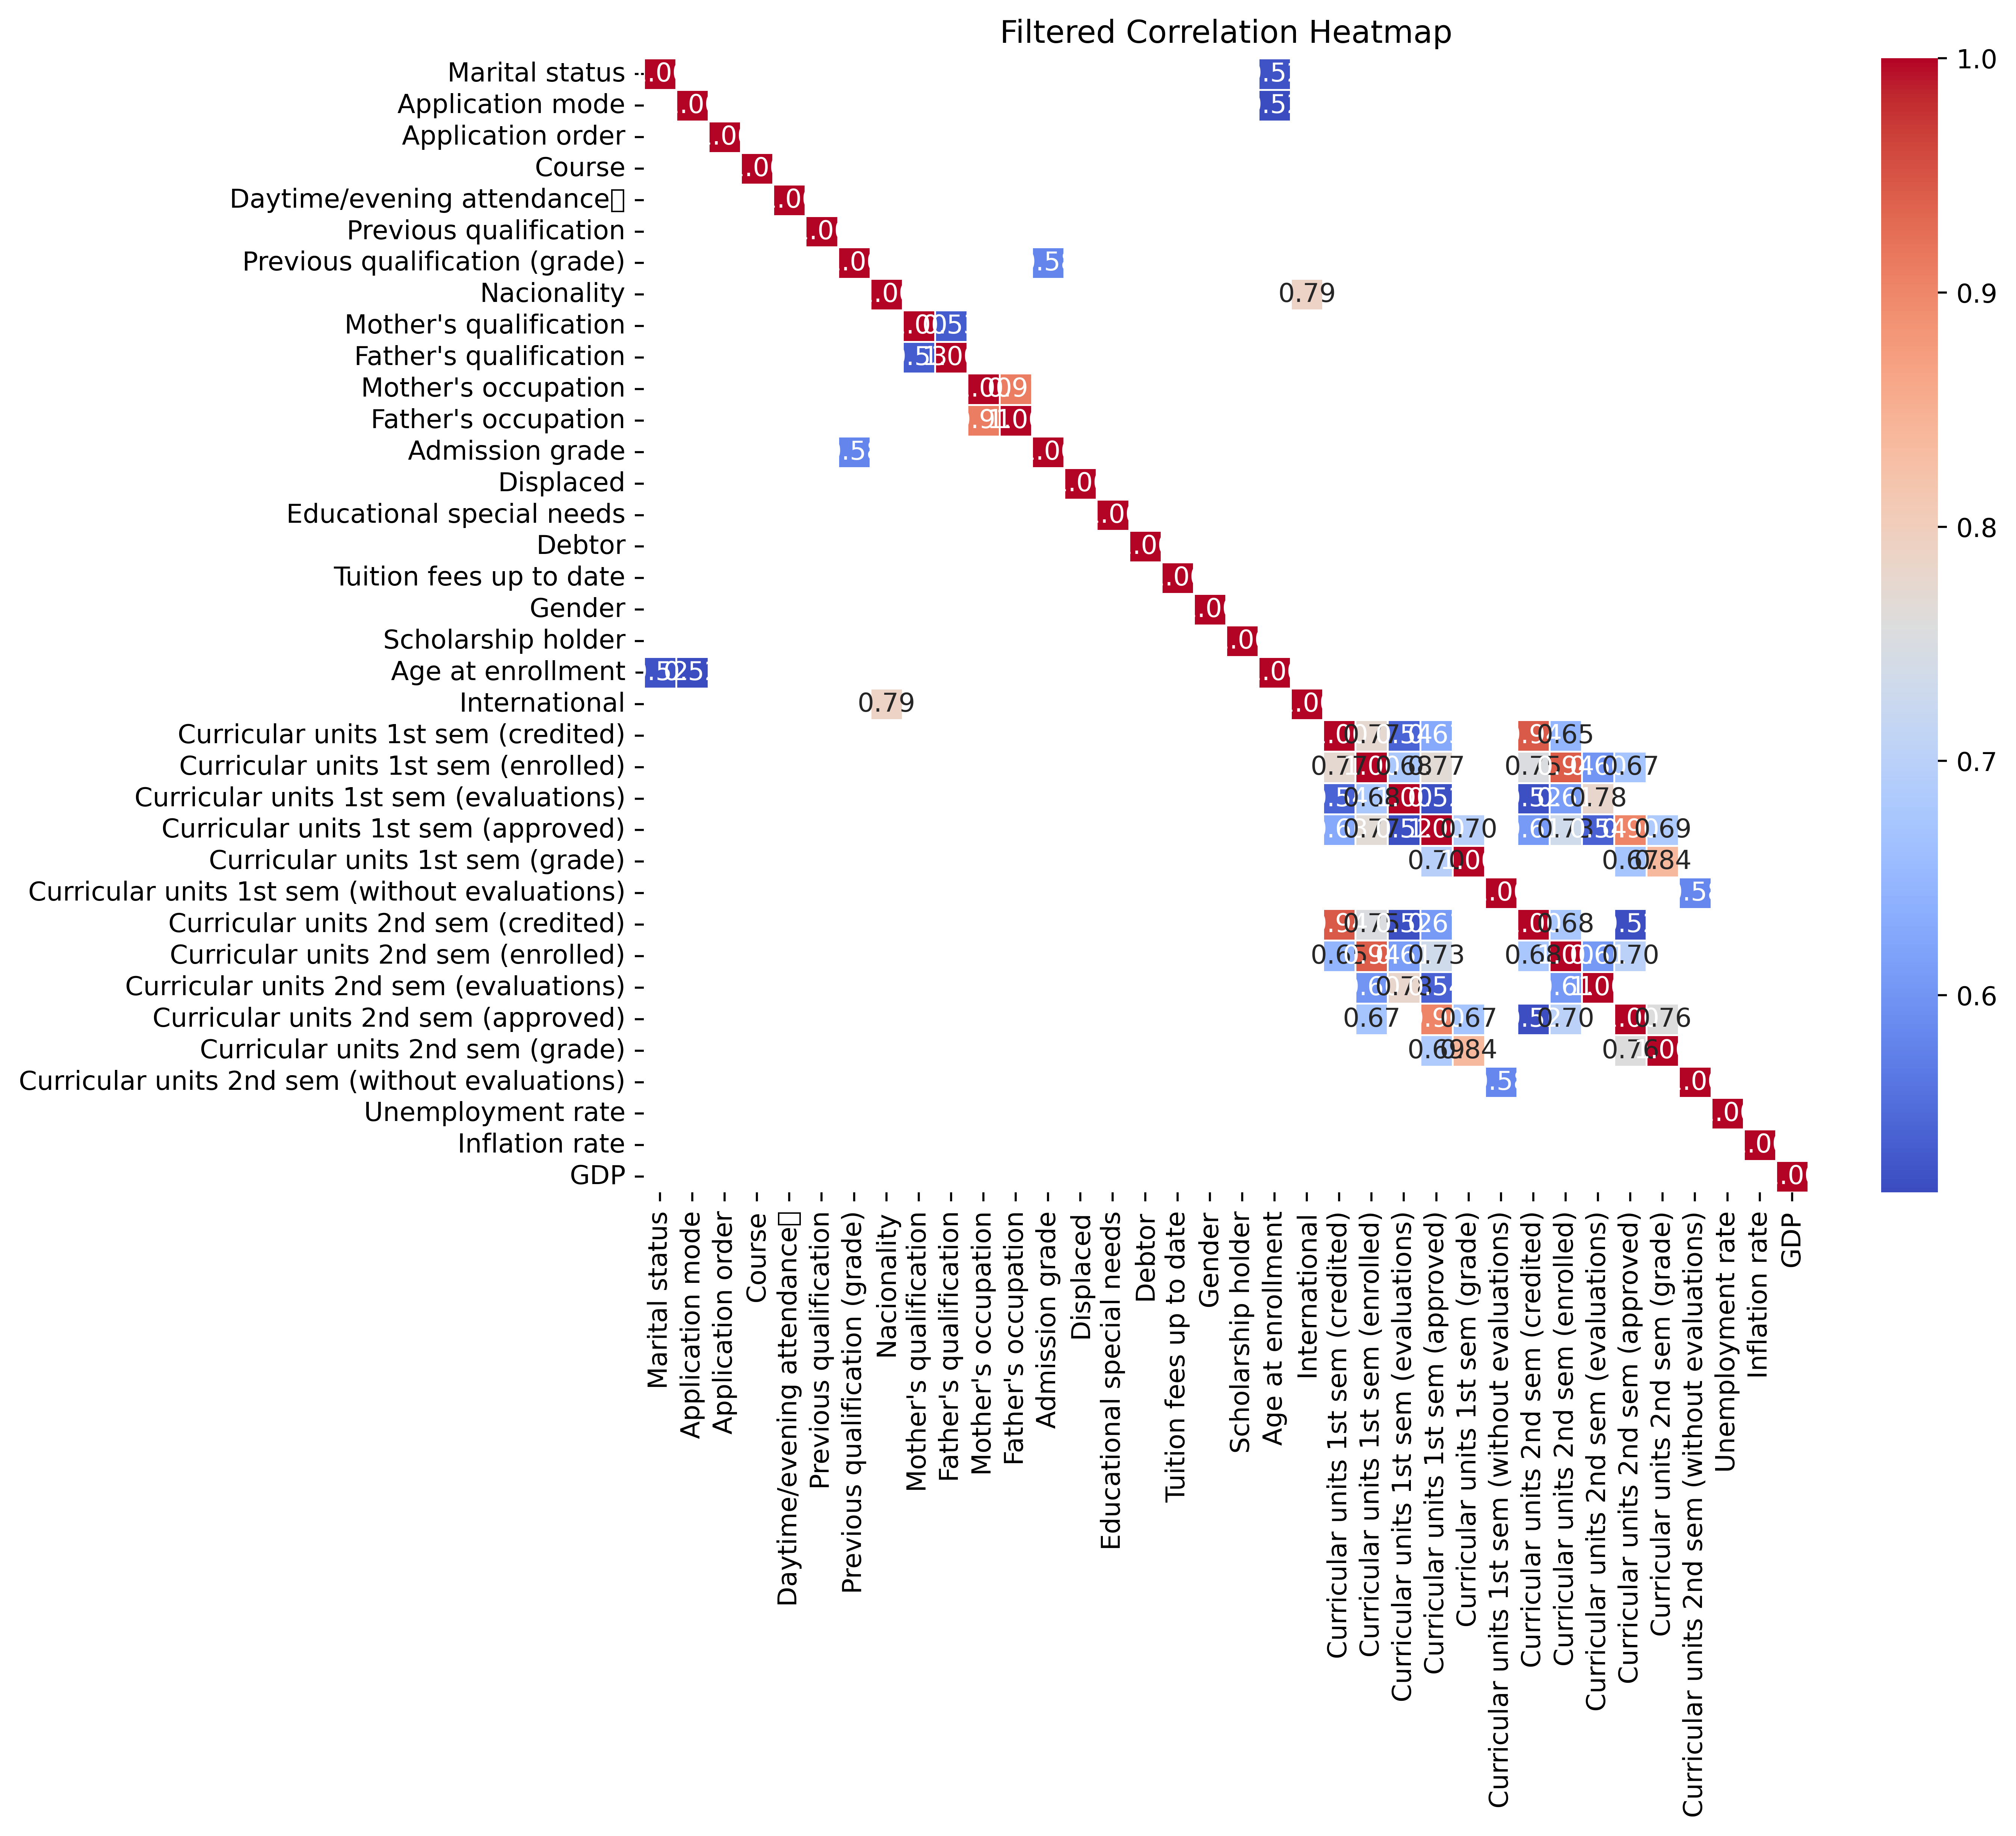

In [13]:
corr_threshold = 0.5
filtered_corr = corr[(corr > corr_threshold) | (corr < -corr_threshold)]

plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(filtered_corr, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Filtered Correlation Heatmap")
plt.show()